# LABORATORIO SPICE

En todo este Notebook de Jupyter, se utilizará el estándar [SPICE](http://bwrcs.eecs.berkeley.edu/Classes/IcBook/SPICE/) para realizar simulaciones en circuitos de corriente continua y alterna. Utilizaremos Ahkab y LTspice en las diversas simulaciones.

> Existen diversos intérpretes de Spice aunque en este laboratorio utilicemos dos de ellos. Se nombran a continuación algunos de ellos:


| Intérprete | Licencia |  Fabricante                           | Versión   | Características                                        |  Referencia                                                              |
| :--------: | :------: | :-----------------------------------  | :-----:   | :------------------                                    |  :-----------:                                                           |
| Ahkab      | GPL      | Giuseppe Venturini                    | 0.18      | Basado en Python                                       | [GitHub](https://ahkab.github.io/ahkab/)                                 |
| Ngspice    | BSD      | Universidad de California             | 33        | Basado en C                                            | [Sourceforge](http://ngspice.sourceforge.net/docs/ngspice-33-manual.pdf) |
| LTspice    | GPL      | Analog Devices, Inc. (Mike Engelhardt)| 17.0.21.0 | Permite dibujar los circuitos y ejecutar la simulación | [Analog Devices](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) |
| PartSim    | GPL      | Arrow Electronics, Inc./Aspencore     | 2.2.7     | En la nube, aplicación web basada en Ngspice y C       | [PartSim](https://www.partsim.com/)                                      |
| MacSpice   | GPL      |Charles D. H. William                  | 3.1.24    | Basado en bash                                         | [MacSpice](https://www.macspice.com/Copyright.html)                      |
| PySpice    | GPLv3    | Fabrice Salvaire                      | 1.4.3     | Basado en Python, usa Ngspice                          | [PySpice](https://pypi.org/project/PySpice/)                             |
| gEDA       | GPL      | Ales Hvezda                           | 1.8.2     | Basado en C                                            | [gEDA project](http://www.geda-project.org/)                             |


> **SPICE3** es un lenguaje estándar para la simulación de circuitos. Su actual versión SPICE3, fue desarrollada por Thomas Quarless con características nuevas e interfaz gráfica, y está desarrollada en lenguaje C. Es por ello, que además de poder cargarse desde un texto plano, se puede ejecutar con comandos (como pasa con C).
 
Compiladores de C:DevC++, CodeBlock, GCC, MinGW, Turbo C, etc.

> A continuación, especificamos una tabla de prefijos de múltiplos de las [unidades del Sistema Internacional](https://en.wikipedia.org/wiki/SI_electromagnetism_units) que podrían hacer falta al especificar los componentes y valores del **netlist**

## TABLA DE PREFIJOS DE MÚLTIPLOS

| Prefijo | Abreviatura | Equivalencia |
| :-----: | :---------: | :----------: |
| yotta   | Y           | $10^{24}$    | 
| zetta   | Z           | $10^{21}$    |
| exa     | E           | $10^{18}$    |
| peta    | P           | $10^{15}$    |
| tera    | T           | $10^{12}$    |
| giga    | G           | $10^9$       |
| mega    | M           | $10^6$       |
| kilo    | k           | $10^3$       |
| hecto   | h           | $10^2$       |
| deca    | da          | $10^1$       |
| deci    | d           | $10^{-1}$    |
| centi   | c           | $10^{-2}$    |
| mili    | m           | $10^{-3}$    |
| micro   | u           | $10^{-6}$    |
| nano    | n           | $10^{-9}$    |
| pico    | p           | $10^{-12}$   |
| femto   | f           | $10^{-15}$   |
| atto    | a           | $10^{-18}$   |
| zepto   | z           | $10^{-21}$   |
| yocto   | y           | $10^{-24}$   |



Referencia: [Wikipedia](https://es.wikipedia.org/wiki/Prefijos_del_Sistema_Internacional)

> Las posibles unidades que podamos utilizar durante la práctica son:

## Tabla unidades del Sistema Internacional usados en el Tema 5: Circuitos Eléctricos

| Magnitud                | Propiedad         | Símbolo  |
| :---------------------: | :---------------: | :------: |
| Carga Eléctrica         | Culombio          | $C$      |
| Corriente Eléctrica     | Amperio           | $A$      |
| Diferencia de Potencial | Voltio            | $V$      |
| Resistencia             | Ohm               | $\Omega$ |
| Trabajo                 | Watio             | $W$      |
| Capacidad               | Faradio           | $F$      |
| Electricidad            | Voltio por metro  | $V/m$    |
| Resistividad            | Faradio por metro | $F/m$    |


> Los lenguajes en los que mejor encajaría **SPICE**, debido a su desarrollo en lenguaje C:     
- **Procedurales/imperativos**, ya que puedes cargar un bloque de código mediante una llamada a un procedimiento o función.
- **Estructurados**, ya que hay que seguir una estructura concreta para interpretar bien los datos.


> El parámetro `uic` en los análisis `.tran`, significa: USE INITIAL CONDITIONS. Esto se utiliza para establecer el estado del circuito en el momento `t=tstart`, los valores posibles son:    


| Valor | Instrucción |
| :---: | :---------- |
| 0 | Todos los nodos de voltajes e intensidades de fuentes/e/h/v comienzan en 0 cuando `t=tstart`.|
| 1 | El estado del circuito en t=tstart es el último resultado del análisis OP|
| 2 | El estado del circuito en t=tstart es el último resultado del análisis OP en el que están establecidos los valores de intensidades a través de inductores y voltajes en los condensadores especificados en su `ic`|
| 3 | EL usuario carga un `ic` (archivo de estado)|


> Al igual que Ahkab es una implementación en Python del estándar **SPICE**, existen otros ejemplos:    

| Estándar | Implementación | Características |
| :------: | :------------: | :-------------- |
| ODF (OpenDocument) | LibreOffice | Formato de archivo para el almacenamiento de documentos ofimáticos basado en lenguaje de esquema XML (Desarrollado en C++, Java y Python) |
| JavaScript, CSS | Bootstrap | Framework para construir sitios responsive (páginas web), para que se adapten al tamaño del dispositivo (Desarrollado en HTML, CSS, LESS y Javascript) |
| Python | NumPy | Biblioteca para la creación de vectores y matrices multidimensionales, demás de operaciones de alto nivel (Desarrollado en Python, C y Fortran)|
| SVG | Inkscape | Editor de vectores gráficos multiplataforma (Desarrollado en C++ y GTK)|

> El creador de Ahkab es **Giuseppe Venturini** con la contribución de Ian Daniher y Rob Crowther. El objetivo de esta implementación de SPICE y Python es el de realizar simulaciones de circuitos de una forma más sencilla y visible para el usuario, y entender qué está sucediendo en el circuito durante la simulación.
La licencia que utiliza es GPL para libre uso y modificación personal. Sus versiones van de la v0.10 a la v0.18

In [ ]:
!pip install ahkab

In [ ]:
!conda install -y -c conda-forge matplotlib

> `pylab` es un módulo/API de Python que incluye `matplotlib.pyplot` y `numpy` que aporta funciones adicionales, todo en un solo namespace

## Circuitos sencillos para trabajar con la ley de Ohm
Primero justificamos la naturaleza de ambos lados de la siguiente asignación:
$$
V = I\cdot R
$$
$$
V\cdot \mathrm{\big(V \big)} = I\cdot \mathrm{\big(A \big)}\cdot R\cdot \mathrm{\big(\Omega \big)}
$$
Sabiendo además, teniendo en cuenta la energía calórica en función del tiempo que se produce en el circuto es la POTENCIA:
$$
P = I\cdot V\, \rightarrow P = I\cdot \big(I\cdot R\big)\, \rightarrow R = \frac{P}{I^2}
$$
Juntamos toda la ecuación:
$$
V = I\cdot \frac{P}{I^2}\, \rightarrow V = \frac{P}{I}
$$
Descomponemos en sus unidades fundamentales para comprobar la igualdad de la ecuación:
$$
V\big(\mathrm{V}\big) = \frac{P\big(\mathrm{W}\big)}{I\big(\mathrm{A}\big)}
$$
Sabiendo que:
$$
\mathrm{V = \frac{J}{C}}\, \rightarrow \mathrm{W = \frac{J}{s}}
$$
Entonces, volviendo a la ecuación de antes y sabiendo que $C = A\cdot s$
$$
\mathrm{\frac{J}{C} = \frac{J/s}{A}}\, \rightarrow \mathrm{\frac{N\cdot m}{A\cdot s} = \frac{N\cdot m}{A\cdot s}}
$$
Verificamos entonces que las unidades en ambos lados de la igualdad son las mismas

## Primera simulación del circuito eléctrico en corriente continua

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/primer%20circuito.svg?sanitize=true)

In [1]:
import pylab as plt
import ahkab

W: Locale appears not set! please export LANG="en_US.UTF-8" or equivalent, 
W: or ahkab's unicode support is broken.


In [2]:
%%writefile "circuito sencillo.sp"
* Circuito de corriente continua
r1 1 0 10
v1 0 1 type=vdc vdc=9
.op
.dc v1 start=0 stop=9 step=1
.end

Overwriting circuito sencillo.sp


In [3]:
# Leemos descripción del fichero con Ahkab, interpretamos y ejecutamos las simulaciones descritas
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito sencillo.sp')
# Separamos la información del netlist en componentes de los análisis (uno de tipo .op y otro de tipo .dc):
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
print(lista_de_analisis)

[{'type': 'op', 'guess': True, 'x0': None}, {'type': 'dc', 'source': 'v1', 'start': 0.0, 'stop': 9.0, 'step': 1.0, 'sweep_type': 'LIN'}]


> `lista_de_analisis` Devuelve una lista de diccionarios, [referencia](https://ahkab.readthedocs.io/en/latest/netlist_parser.html#ahkab.netlist_parser.parse_analysis).

In [4]:
#Código condicional para realizar el archivo outfile cuando el tipo de análisis sea .dc ó .tran
for i, value in enumerate(lista_de_analisis):
    if "dc" in lista_de_analisis[i]["type"] or "tran" in lista_de_analisis[i]["type"]:
        #print(lista_de_analisis[i])
        lista_de_analisis[1]['outfile'] = "simulacion dc.tsv"

In [5]:
[i for i, d in enumerate(lista_de_analisis) if "dc" in d.values()]
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['dc'])


Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting DC analysis:
Solving...  done
<DC simulation results for '* circuito de corriente continua' (netlist circuito sencillo.sp). LIN sweep of V1 from 0 to 9 V. Run on 2021-01-06 20:31:21, data file simulacion dc.tsv>


In [6]:
#print(resultados['dc'])
print(resultados['dc'].keys())

['V1', 'V1', 'I(V1)']


Text(0, 0.5, 'Intensidad(A)')

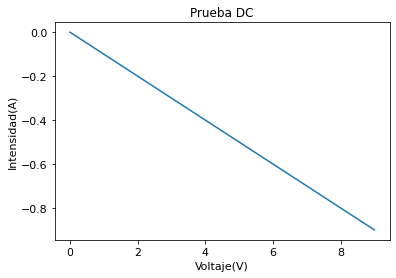

In [7]:
figura = plt.figure()
plt.title("Prueba DC")
plt.plot(resultados['dc']['V1'], resultados['dc']['I(V1)'], label= "Voltaje (V1)")
plt.xlabel('Voltaje(V)')
plt.ylabel('Intensidad(A)')

> Utilizamos la librería `mathplotlib` para dibujar la gráfica. En esta gráfica podemos comprobar que teniendo una constante de proporcionalidad $R$(Resistencia), cuanto mayor es el voltaje mayor es la intensidad del circuito.
$$
I = \frac{V}{R}
$$


In [8]:
print(resultados['op'].results)

{V1: -9.0, I(V1): -0.9}


## Resolución con unidades (`Sympy`)

In [9]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import convert_to
from sympy import solve, symbols, Eq

#Cogemos el voltaje del atributo de parada del análisis 'dc' porque coincide con el voltaje inicial y la intensidad resultante del análisis 'op'
voltage=lista_de_analisis[1]['stop']*volts
current_result=abs(resultados['op']['I(V1)'])*amperes
resistence = 10*ohms
# La intensidad es la incógnita a calcular
current = symbols('i')
law_ohm = Eq(voltage, current * resistence)
#Resolvemos la Ley de Ohm. solution_current es el atributo de la Intensidad calculada por la fórmula
solution_current = solve(law_ohm, current)
# Convertimos a las mismas unidades ambos atributos. current_representation es el atributo de la Intensidad calculada por el análisis que realiza Ahkab
solution_current[0] = convert_to(solution_current[0],[amperes]).n(2)
current_representation = convert_to(current_result[0][0], [amperes]).n(2)
# Comparamos si la intensidad calculada es la misma que la hallada por Ahkab por el análisis 'op' (Realizado anteriormente)
if(solution_current[0] == current_representation):
    print("Solución correcta")

Solución correcta


In [10]:
# Ahora calculamos las intensidades según el voltaje de 'dc', para ello reiniciamos la variable "voltage"
voltage = lista_de_analisis[1]['start']*volts
voltage_stop =int(lista_de_analisis[1]['stop']) 
while(i <= voltage_stop):
  voltage +=1*volts
  law_ohm = Eq(voltage, current * resistence)
  # currents es el atributo de la intensidad calculada para diferenciarla de las intensidades utilizadas en el bloque anterior
  currents=solve(law_ohm,current)
  currents=convert_to(currents[0],[amperes]).n(2)
  print("Voltaje[",i,"]", voltage)
  print("Intensidad de corriente[",i,"]",currents)
  i +=1
# Queda confirmado que da el mismo resultado que el análisis 'dc' calculado anteriormente

Voltaje[ 1 ] volt
Intensidad de corriente[ 1 ] 0.1*ampere
Voltaje[ 2 ] 2*volt
Intensidad de corriente[ 2 ] 0.2*ampere
Voltaje[ 3 ] 3*volt
Intensidad de corriente[ 3 ] 0.3*ampere
Voltaje[ 4 ] 4*volt
Intensidad de corriente[ 4 ] 0.4*ampere
Voltaje[ 5 ] 5*volt
Intensidad de corriente[ 5 ] 0.5*ampere
Voltaje[ 6 ] 6*volt
Intensidad de corriente[ 6 ] 0.6*ampere
Voltaje[ 7 ] 7*volt
Intensidad de corriente[ 7 ] 0.7*ampere
Voltaje[ 8 ] 8*volt
Intensidad de corriente[ 8 ] 0.8*ampere
Voltaje[ 9 ] 9*volt
Intensidad de corriente[ 9 ] 0.9*ampere


## Resolución del circuito en LTspice

In [11]:
import platform
%alias lts /Applications/LTspice.app/Contents/MacOS/LTspice -ascii -b
if platform.system() == "Windows":
    %alias lts "C:\Program Files\LTC\LTspiceXVII\XVIIx64.exe" -ascii -b

El comando `-ascii` lo que hace es utilizar archivos ASCII de extebsión `.raw`, que son unos archivos parecidos a los `.outfile` que usamos en Ahkab.   
El comando `-b` ejecutará el comando por lotes, de modo que no se necesita interacción por parte del usuario.

In [12]:
%%writefile "circuito sencillo.net"
* Este es un circuito de corriente continua adaptado para LTspice
r1 1 0 100
v1 0 1 9
.op
* Comentamos el análisis .dc para centrarnos primero en el .op
* .dc v1 1 10
.end

Overwriting circuito sencillo.net


In [13]:
lts "circuito sencillo.net"

In [14]:
%pycat circuito sencillo.log

Circuit: * Este es un circuito de corriente continua adaptado para LTspice

Direct Newton iteration for .op point succeeded.

Date: Wed Jan 06 21:31:57 2021
Total elapsed time: 0.006 seconds.

tnom = 27
temp = 27
method = trap
totiter = 3
traniter = 0
tranpoints = 0
accept = 0
rejected = 0
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1: 36 bytes object code size
Matrix Compiler2: 96 bytes object code size


In [15]:
%%writefile "circuito sencillo.net"
* Este es un circuito de corriente continua adaptado para LTspice
r1 1 0 100
v1 0 1 9
* .op
* Comentamos el análisis .dc para centrarnos primero en el .op
.dc v1 1 10
.end

Overwriting circuito sencillo.net


In [16]:
lts "circuito sencillo.net"

In [ ]:
!pip install ltspice

Text(0, 0.5, 'Voltaje (V)')

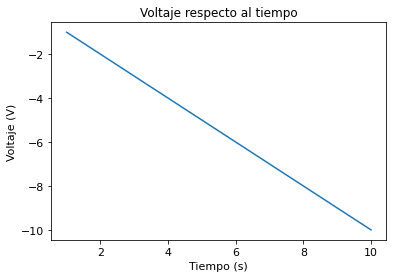

In [17]:
import ltspice
l = ltspice.Ltspice("circuito sencillo.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
# Podemos pintar la corriente en función del tiempo
# plt.plot(tiempo,corriente)
# plt.xlabel('Tiempo(s)')
# plt.ylabel('Intensidad(A)')
# O el voltaje
plt.plot(tiempo, voltaje)
plt.title('Voltaje respecto al tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Voltaje (V)')

In [18]:
!ahkab "circuito sencillo.sp"

2021-01-06 20:32:13
ahkab v. 0.18 (c) 2006-2015 Giuseppe Venturini

Operating Point (OP) analysis

Netlist: circuito sencillo.sp
Title: * circuito de corriente continua
At 300.00 K
Options:
	vea = 1.000000e-06
	ver = 0.001000
	iea = 1.000000e-09
	ier = 0.001000
	gmin = 0.000000e+00

Convergence reached in 2 iterations.

RESULTS:

Variable    Units      Value        Error    %
----------  -------  -------  -----------  ---
V1          V           -9    9.00002e-12    0
I(V1)       A           -0.9  0              0

ELEMENTS OP INFORMATION:

Part ID      R [Ω]    V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  -------  --------------  ---------------  -------
R1              10              -9             -0.9      8.1

Part ID      V(n1,n2) [V]    I(n1->n2) [A]    P [W]
---------  --------------  ---------------  -------
V1                      9             -0.9     -8.1

Total power dissipation: 8.1 W

#V1	V1	I(V1)
0.000000000000000000e+00	0.000000000000000000e+00	0.000000000000000

## Análisis de circuito con resistencias en serie

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20serie.svg?sanitize=true)

In [19]:
%%writefile "resistencias en serie.net"
* Circuito en serie con 3 resistencias
V1 1 0 type=vdc vdc=9
R1 0 2 3k
R2 2 3 10k
R3 3 1 5k
* análisis del circuito
.op
.end

Overwriting resistencias en serie.net


In [20]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('resistencias en serie.net')
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['op'])

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '* circuito en serie con 3 resistencias'(netlist resistencias en serie.net).
Run on 2021-01-06 20:32:21, data file None.
Variable    Units      Value     Error    %
----------  -------  -------  --------  ---
V1          V         9       -9e-12      0
V2          V         1.5     -1.5e-12    0
V3          V         6.5     -6.5e-12    0
I(V1)       A        -0.0005   0          0


### Resolución manual 

In [22]:
from sympy.physics.units import ohms, amperes, volts
from sympy.physics.units import kilo
from sympy.physics.units import convert_to
from sympy import solve, symbols, Eq
# Resolución de circuito en serie con 3 resistencias
voltage = 9*volts
resistence = [3*kilo*ohms,10*kilo*ohms,5*kilo*ohms]
r_total=0
current_ = symbols('i')
for i in range(len(resistence)):
    r_total += resistence[i] 
law_ohm = Eq(voltage, current_ * r_total)
solution_current = solve(law_ohm, current_)
convert_to(solution_current[0],[amperes]).n(2)

0.0005*ampere

En un circuito en serie, la intensidad en cada uno de los bornes es exactamente la misma:
$$
I_T = I_1 = I_2 = I_3 = 5\cdot 10^{-4} \mathrm{A}
$$

In [23]:
# Cálculo de los Voltajes en cada una de las resistencias según la Ley de Ohm
solution_voltage = 0
# Con el atributo voltage_f, calcularé la suma de los voltajes en todas las resistencas para después comparar con la del voltaje de la pila. Ley de Kirchhoff
voltage_f = 0
#Voltaje ahora es la incógnita de la Ley de Ohm, movemos el valor de voltage a otro atributo "voltage_circuit" para no perder el valor original
voltage_circuit= voltage
voltage = symbols('v')
for i in range(len(resistence)):
    law_ohm = Eq (voltage, solution_current[0]*resistence[i])
    solution_voltage = solve(law_ohm, voltage)
    # Utilizamos voltage_f para ir sumando los voltajes que se van calculando durante el circuito
    voltage_f += solution_voltage[0]
    # Imprimimos los valores de V1 , V2 y V3 hallados por la Ley de Ohm
    print(convert_to(solution_voltage[0],[volts]).n(2))    
#Verificación de la Ley de Kirchhoff:
if voltage_f == voltage_circuit: 
    print ("Se cumple la Ley de Kirchhoff")    

1.5*volt
5.0*volt
2.5*volt
Se cumple la Ley de Kirchhoff


## Análisis .op de circuitos con resistencias en paralelo

![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/resistencias%20en%20paralelo.svg?sanitize=true)

### Circuito 1 

In [25]:
%%writefile "circuito paralelo1.sp"
*Este es el primer circuito paralelos de 1 pila y 4 resistencias con ahkab
V 0 1 type=vdc vdc=12
Vdummy1 4 2 type=vdc vdc=0
Vdummy2 5 3 type=vdc vdc=0
R1 1 2 1k
R2 4 0 470
R3 2 3 220
R4 5 0 1.5k
.op
.end

Overwriting circuito paralelo1.sp


In [26]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito paralelo1.sp')
circuito = circuito_y_analisis[0]       
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['op'])
print(resultados['op'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '*este es el primer circuito paralelos de 1 pila y 4 resistencias con ahkab'(netlist circuito paralelo1.sp).
Run on 2021-01-06 20:32:38, data file None.
Variable    Units           Value        Error    %
----------  -------  ------------  -----------  ---
V1          V        -12           1.2e-11        0
V4          V         -3.23533     3.23533e-12    0
V2          V         -3.23533     3.23533e-12    0
V5          V         -2.8215      2.82151e-12    0
V3          V         -2.8215      2.82151e-12    0
I(V)        A         -0.00876467  0              0
I(VDUMMY1)  A          0.00688367  0              0
I(VDUMMY2)  A          0.001881    0              0
['V1', 'V4', 'V2', 'V5', 'V3', 'I(V)', 'I(VDUMMY1)', 'I(VDUMMY2)']


In [27]:
# Utilizamos esta variable para recorrer las claves de la lista de diccionarios
index=resultados['op'].keys()
# En esta variable sumaremos las intensidades para la comprobación de la ley Kirschhoff
current_sum=0
# Calculamos si se cumple la ley de Kirschoff respecto a la Intensidad del circuito con los valores dados por el análisis 'op'
for i in index:                      
    if(i[0]=='I' and i!='I(V)'):
        current_sum += convert_to(resultados['op'][i][0][0],[amperes]).n(2)     
if(int(resultados['op']['I(V)'][0][0]) == int(current_sum)):
    print("Se cumple la ley de Kirchhoff")
convert_to(resultados['op']['I(V)'][0][0],[amperes]).n(2)

Se cumple la ley de Kirchhoff


-0.0088

In [28]:
# Recalculamos los voltajes con Sympy.
resistence = [1*kilo*ohms, 470*ohms, 220*ohms, 1.5*kilo*ohms]
# Rescatamos el valor del generador para utilizarlo después para confirmar que se cumple la ley de Kirschhoff
voltage_i=abs(resultados['op']['V1'][0][0]*volts)
voltage = symbols('v')
i=resultados['op']['I(V)'][0][0]*amperes
i_dummy1 = resultados['op']['I(VDUMMY1)'][0][0]*amperes
i_dummy2 = resultados['op']['I(VDUMMY2)'][0][0]*amperes
# Cálculo del V(1) respecto a I(V) 
law_ohm = Eq(voltage, i*resistence[0])
v1=solve(law_ohm,voltage)
# Cálculo del V(2) respecto a I(Vdummy1)
law_ohm = Eq(voltage, i_dummy1*resistence[1])
v2=solve(law_ohm,voltage)
# Cálculo del V(3) respecto a la I(Vdummy2)
law_ohm = Eq(voltage, i_dummy2*resistence[2])
v3=solve(law_ohm,voltage)
# Cálculo del V(4) respecto a la I(Vdummy2)
law_ohm = Eq(voltage, i_dummy2*resistence[3])
v4=solve(law_ohm,voltage)
if(convert_to(abs(v1[0])+abs(2*v2[0])-abs(v3[0])-abs(v4[0]),[volts]).n(2) - voltage_i ==0):
    print("Se cumple la ley de Kirchhoff")

Se cumple la ley de Kirchhoff


### Circuito 2

In [29]:
%%writefile "circuito paralelo2.sp"
*Este es el primer circuito paralelos de 2 pilas y 5 resistencias con ahkab
V 0 1 type=vdc vdc=9
Vdummy 6 5 type=vdc vdc=0
V2 0 3 type=vdc vdc=1.5
R1 1 2 47
R2 2 4 220
R3 2 3 180
R4 4 5 1k
R5 6 0 560
.op
.end

Overwriting circuito paralelo2.sp


In [30]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito paralelo2.sp')
circuito = circuito_y_analisis[0]       
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['op'])
print(resultados['op'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '*este es el primer circuito paralelos de 2 pilas y 5 resistencias con ahkab'(netlist circuito paralelo2.sp).
Run on 2021-01-06 20:32:46, data file None.
Variable    Units          Value        Error    %
----------  -------  -----------  -----------  ---
V1          V        -9           8.99997e-12    0
V6          V        -2.29487     2.29487e-12    0
V5          V        -2.29487     2.29487e-12    0
V3          V        -1.5         1.5e-12        0
V2          V        -7.29441     7.29442e-12    0
V4          V        -6.39285     6.39286e-12    0
I(V)        A        -0.0362891   0              0
I(VDUMMY)   A         0.00409798  0              0
I(V2)       A         0.0321912   0              0
['V1', 'V6', 'V5', 'V3', 'V2', 'V4', 'I(V)', 'I(VDUMMY)', 'I(V

In [31]:
# Utilizamos esta variable para recorrer las claves de la lista de diccionarios
index=resultados['op'].keys()
# En esta variable sumaremos las intensidades para la comprobación de la ley Kirschhoff
current_sum=0
# Calculamos si se cumple la ley de Kirschoff respecto a la Intensidad del circuito con los valores dados por el análisis 'op'
for i in index:                      
    if(i[0]=='I' and i!='I(V)'):
        current_sum += convert_to(resultados['op'][i][0][0],[amperes]).n(2)     
if(int(resultados['op']['I(V)'][0][0]) == int(current_sum)):
    print("Se cumple la ley de Kirchhoff")
convert_to(resultados['op']['I(V)'][0][0],[amperes]).n(2)

Se cumple la ley de Kirchhoff


-0.036

In [32]:
# Recalculamos los voltajes con Sympy.
resistence = [47*ohms, 220*ohms, 180*ohms, 1*kilo*ohms, 560*ohms]
# Rescatamos los valores de los generadores para utilizarlos después para confirmar que se cumple la ley de Kirschhoff
voltage_i=abs(resultados['op']['V1'][0][0]*volts)
voltage_i2=abs(resultados['op']['V3'][0][0]*volts)
voltage = symbols('v')
i=resultados['op']['I(V)'][0][0]*amperes
i_dummy = resultados['op']['I(VDUMMY)'][0][0]*amperes
i2 = resultados['op']['I(V2)'][0][0]*amperes
# Cálculo del V(1) respecto a I(V) 
law_ohm = Eq(voltage, i*resistence[0])
v1=solve(law_ohm,voltage)
# Cálculo del V(2) respecto a I(Vdummy)
law_ohm = Eq(voltage, i_dummy*resistence[1])
v2=solve(law_ohm,voltage)
# Cálculo del V(3) respecto a la I(V2)
law_ohm = Eq(voltage, i2*resistence[2])
v3=solve(law_ohm,voltage)
# Cálculo del V(4) respecto a la I(Vdummy)
law_ohm = Eq(voltage, i_dummy*resistence[3])
v4=solve(law_ohm,voltage)
# Cálculo del V(5) respecto a la I(Vdummy)
law_ohm = Eq(voltage, i_dummy*resistence[4])
v5=solve(law_ohm,voltage)

if(convert_to(abs(v1[0])-abs(v2[0])+abs(2*v3[0])-abs(v4[0])-abs(v5[0]),[volts]).n(2) + 2*voltage_i2 - voltage_i ==0):
     print("Se cumple la ley de Kirchhoff")

Se cumple la ley de Kirchhoff


### Circuito 3

In [33]:
%%writefile "circuito paralelo3.sp"
*Este es el primer circuito paralelos de 4 pilas y 3 resistencias con ahkab
V 0 1 type=vdc vdc=9
V1 2 1 type=vdc vdc=0
V2 3 1 type=vdc vdc=0
V3 4 1 type=vdc vdc=0
R1 2 0 10k
R2 3 0 2k
R3 4 0 1k
.op
.end

Overwriting circuito paralelo3.sp


In [34]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit('circuito paralelo3.sp')
circuito = circuito_y_analisis[0]       
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['op'])
print(resultados['op'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
OP simulation results for '*este es el primer circuito paralelos de 4 pilas y 3 resistencias con ahkab'(netlist circuito paralelo3.sp).
Run on 2021-01-06 20:32:53, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V        -9         9e-12    0
V2          V        -9         9e-12    0
V3          V        -9         9e-12    0
V4          V        -9         9e-12    0
I(V)        A        -0.0144    0        0
I(V1)       A         0.0009    0        0
I(V2)       A         0.0045    0        0
I(V3)       A         0.009     0        0
['V1', 'V2', 'V3', 'V4', 'I(V)', 'I(V1)', 'I(V2)', 'I(V3)']


In [35]:
# Utilizamos esta variable para recorrer las claves de la lista de diccionarios
index=resultados['op'].keys()
# En esta variable sumaremos las intensidades para la comprobación de la ley Kirschhoff
current_sum=0
# Calculamos si se cumple la ley de Kirschoff respecto a la Intensidad del circuito con los valores dados por el análisis 'op'
for i in index:                      
    if(i[0]=='I' and i!='I(V)'):
        current_sum += convert_to(resultados['op'][i][0][0],[amperes]).n(2)     
if(int(resultados['op']['I(V)'][0][0]) == int(current_sum)):
    print("Se cumple la ley de Kirchhoff")
convert_to(resultados['op']['I(V)'][0][0],[amperes]).n(2)

Se cumple la ley de Kirchhoff


-0.014

In [36]:
# Recalculamos los voltajes con Sympy.
resistence = [10*kilo*ohms ,2*kilo*ohms,1*kilo*ohms]
# Rescatamos el valor del generador para utilizarlo después para confirmar que se cumple la ley de Kirschhoff
voltage_i=abs(resultados['op']['V1'][0][0]*volts)
voltage = symbols('v')
i=resultados['op']['I(V)'][0][0]*amperes
i_dummy1 = resultados['op']['I(V1)'][0][0]*amperes
i_dummy2 = resultados['op']['I(V2)'][0][0]*amperes
i_dummy3 = resultados['op']['I(V3)'][0][0]*amperes
# Cálculo del V(1) respecto a I(V) 
law_ohm = Eq(voltage, i_dummy1*resistence[0])
v1=solve(law_ohm,voltage)
# Cálculo del V(2) respecto a I(Vdummy1)
law_ohm = Eq(voltage, i_dummy2*resistence[1])
v2=solve(law_ohm,voltage)
# Cálculo del V(3) respecto a la I(Vdummy2)
law_ohm = Eq(voltage, i_dummy3*resistence[2])
v3=solve(law_ohm,voltage)
if(convert_to(abs(2*v1[0])-abs(v3[0]),[volts]).n(2) - voltage_i ==0):
    print("Se cumple la ley de Kirchhoff")

Se cumple la ley de Kirchhoff


## Circuitos en DC que evolucionan con el tiempo    
![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensador%20en%20continua.svg?sanitize=true)

In [37]:
#Configuramos las gráficas de estándar SVG
%config InlineBackend.figure_formats = ['svg']

In [38]:
%%writefile "condensador en continua.ckt"
* Carga condensador
v1 0 1 type=vdc vdc=6
r1 1 2 1k
c1 2 0 1m ic=0
.op
.tran tstep=0.1 tstop=8 uic=0
.end

Overwriting condensador en continua.ckt


> `ic` es un atributo opcional que indica el voltaje inicial del condensador en el análisis en relación al tiempo `.tran`

In [39]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit("condensador en continua.ckt")
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito,analisis_en_netlist)
lista_de_analisis[1]['outfile'] = "simulacion tran.tsv"

In [40]:
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['op'])
print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.0869565
OP simulation results for '* carga condensador'(netlist condensador en continua.ckt).
Run on 2021-01-06 20:33:06, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V             -6    6e-12    0
V2          V             -6    6e-12    0
I(V1)       A              0    0        0
['T', 'V1', 'V2', 'I(V1)']


Text(0, 0.5, 'Intensidad')

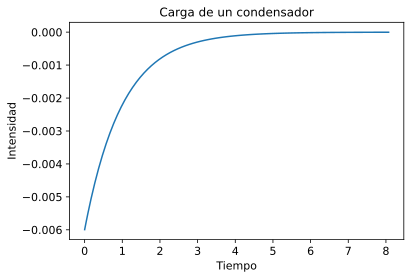

In [41]:
figura = plt.figure()
plt.title("Carga de un condensador")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label = "Una etiqueta")
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')

La intensidad disminuye a medida que pasa el tiempo

Text(0, 0.5, 'Voltaje')

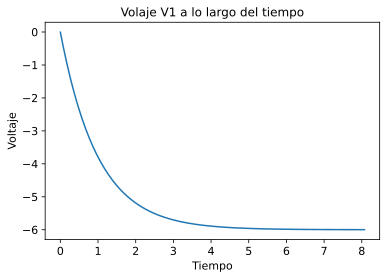

In [42]:
figura = plt.figure()
plt.title("Volaje V1 a lo largo del tiempo")
plt.plot(resultados['tran']['T'],resultados['tran']['V2'])
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')

> Sin embargo, el voltaje a medida que pasa el tiempo aumenta. Según la ecuación de la ecuación que tarda un condensador en cargarse respecto al tiempo:
$$
t=V\cdot C
$$
> A medida que el condensador se carga, la subida total del voltaje debe ser equivalente al consumido

## Carrera de condensadores 
![](https://raw.githubusercontent.com/pammacdotnet/spicelab/master/condensadores%20en%20paralelo.svg?sanitize=true)

In [43]:
%%writefile "carrera en condensadores.ckt"
* Carga condensador
v0 0 1 type=vdc vdc=10
r1 0 2 3k
c1 2 3 47u ic=0
v1dummy 3 1 type=vdc vdc=0
c2 2 4 22u ic=0
v2dummy 4 1 type=vdc vdc=0
.tran tstep=0.01 tstart=6.5 tstop=7.5 uic=0
.end

Overwriting carrera en condensadores.ckt


In [44]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit("carrera en condensadores.ckt")
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito, analisis_en_netlist)
lista_de_analisis [0]['outfile'] = "simulación tran carrera condesadores.tsv"
resultados = ahkab.run(circuito,lista_de_analisis)

Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.00900901


In [45]:
print(resultados['tran']['V4'])

[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.
 -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]


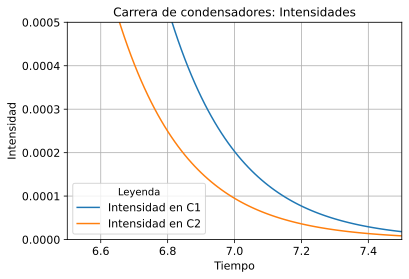

In [46]:
figura = plt.figure()
plt.title("Carrera de condensadores: Intensidades")
plt.xlim(6.50,7.5)
plt.ylim(0.0,0.0005)
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.grid()
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1DUMMY)'], label="Intensidad en C1")
plt.plot(resultados['tran']['T'], resultados['tran']['I(V2DUMMY)'], label="Intensidad en C2")
plt.legend(loc ="lower left", title="Leyenda",frameon=True)


> Como se puede observar en la gráfica, es C2 el condensador que se satura primero

## Circuito en corriente alterna

In [47]:
%%writefile "corriente alterna.net"
* Circuito en corriente alterna
v1 1 0 sin(0 120 60 0 0)
r1 0 1 10k
.tran 1
.end

Overwriting corriente alterna.net


In [48]:
lts "corriente alterna.net"

In [49]:
%pycat corriente alterna.log

Circuit: * Circuito en corriente alterna

.OP point found by inspection.

Date: Wed Jan 06 21:33:27 2021
Total elapsed time: 0.032 seconds.

tnom = 27
temp = 27
method = modified trap
totiter = 4128
traniter = 4128
tranpoints = 2065
accept = 1532
rejected = 533
matrix size = 2
fillins = 0
solver = Normal
Matrix Compiler1: off  [0.0]/0.0/0.0
Matrix Compiler2: off  [0.0]/0.0/0.0


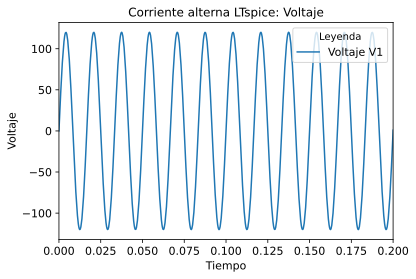

In [50]:
import ltspice
l =ltspice.Ltspice("corriente alterna.raw")
l.parse()
tiempo = l.get_time()
voltaje = l.get_data('V(1)')
corriente = l.get_data('I(V1)')
plt.title("Corriente alterna LTspice: Voltaje")
plt.xlim(0.0,0.2)
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.plot(tiempo,voltaje, label="Voltaje V1")
plt.legend(loc ="upper right", title="Leyenda",frameon=True)

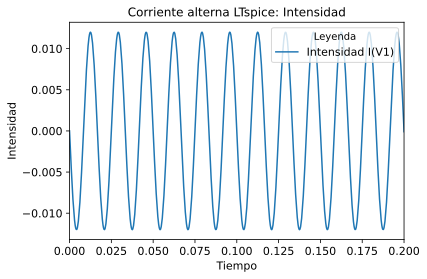

In [51]:
plt.title("Corriente alterna LTspice: Intensidad")
plt.xlim(0.0,0.2)
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.plot(tiempo,corriente, label="Intensidad I(V1)")
plt.legend(loc ="upper right", title="Leyenda",frameon=True)

### Resolución corriente alterna en Ahkab

In [52]:
%%writefile "corriente alterna Ahkab.sp"
* Circuito de corriente alterna con Ahkab
v1 1 0 vdc=0 type=sin VO=0 VA=120 FREQ=60 TD=0 THETA=0 
r1 0 1 10k
.op
.tran tstep=0.001 tstart=0 tstop=0.2 uic=0
.end

Overwriting corriente alterna Ahkab.sp


In [53]:
circuito_y_analisis = ahkab.netlist_parser.parse_circuit("corriente alterna Ahkab.sp")
circuito = circuito_y_analisis[0]
analisis_en_netlist = circuito_y_analisis[1]
lista_de_analisis = ahkab.netlist_parser.parse_analysis(circuito,analisis_en_netlist)
lista_de_analisis[1]['outfile'] = "simulacion tran alterna.tsv"

In [54]:
resultados = ahkab.run(circuito, lista_de_analisis)
print(resultados['op'])
print(resultados['tran'].keys())

Starting op analysis:
Calculating guess: skipped. (linear circuit)
Solving...   done.
Solving...   done.
Difference check within margins.
(Voltage: er=0.001, ea=1e-06, Current: er=0.001, ea=1e-09)
Starting transient analysis: 
Selected method: TRAP
Solving...  done.
Average time step: 0.000483092
OP simulation results for '* circuito de corriente alterna con ahkab'(netlist corriente alterna Ahkab.sp).
Run on 2021-01-06 20:33:42, data file None.
Variable    Units      Value    Error    %
----------  -------  -------  -------  ---
V1          V              0        0    0
I(V1)       A              0        0    0
['T', 'V1', 'I(V1)']


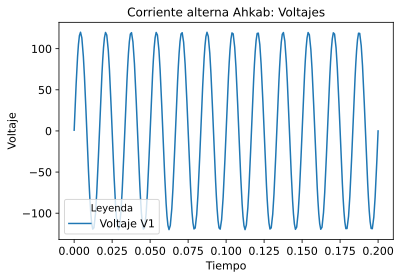

In [55]:
figura = plt.figure()
plt.title("Corriente alterna Ahkab: Voltajes")
plt.xlabel('Tiempo')
plt.ylabel('Voltaje')
plt.plot(resultados['tran']['T'], resultados['tran']['V1'], label="Voltaje V1")
plt.legend(loc ="lower left", title="Leyenda",frameon=True)

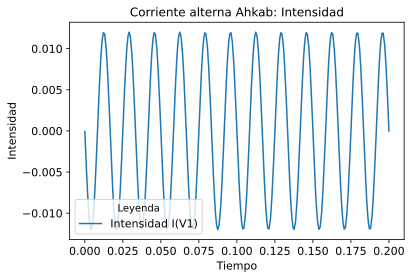

In [56]:
figura = plt.figure()
plt.title("Corriente alterna Ahkab: Intensidad")
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.plot(resultados['tran']['T'], resultados['tran']['I(V1)'], label="Intensidad I(V1)")
plt.legend(loc ="lower left", title="Leyenda",frameon=True)